<a href="https://colab.research.google.com/github/rskarbez/colab_notebooks/blob/main/CSE2DV_CSE5INV_Week_8_lab_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE2DV/CSE5INV - Week 8 lab notebook


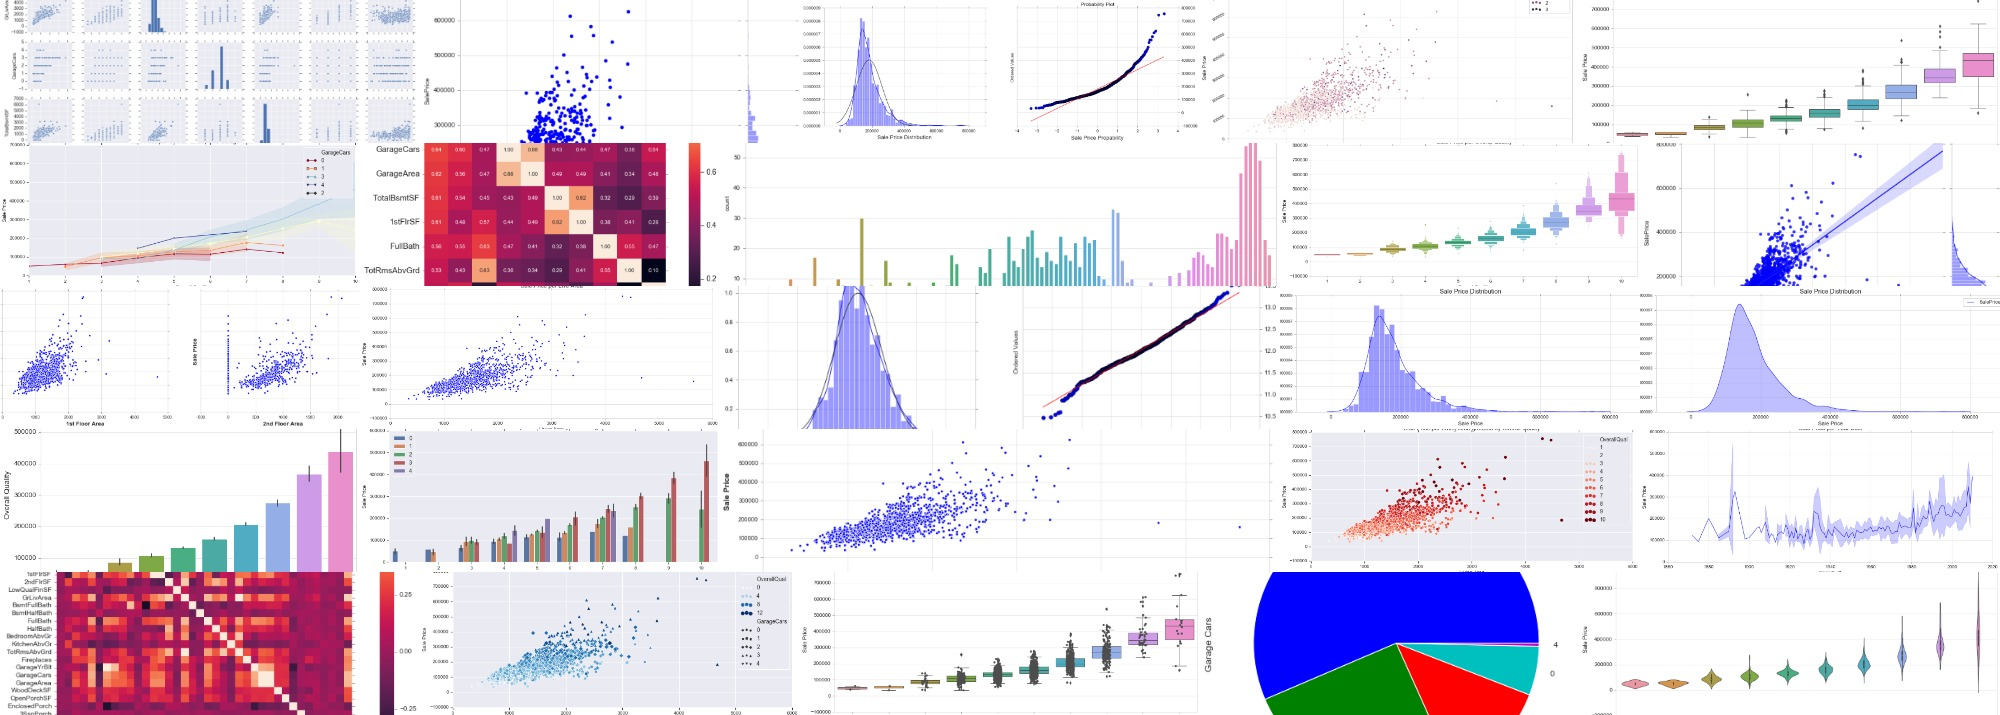

In this week's lab - brought to you as a Google Colab worksheet - we're getting a crash course in Seaborn. We're going to go wide before we go deep: That is, in this lab, we're going to see almost everything that you can do with Seaborn, and in the coming weeks, we're going to dive into specific ways you can customize your visualizations.

You should already be at least a little bit familiar with Python and Colab. With that said, let's get started by running the code in the next cell!

# Our first Seaborn visualization

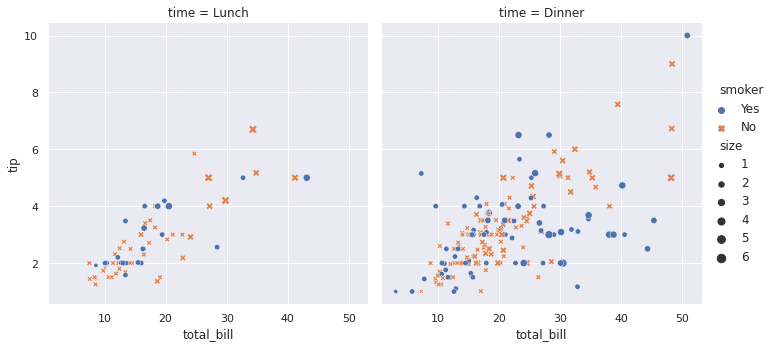

In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme 
# (context = 'notebook', style = 'darkgrid', palette = 'deep')
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

Pretty cool, right? With only a handful of lines of Python code, we're able to create a pretty compelling visualization: two small multiples scatterplots showing the relationships among 5 attributes. Could we have done this in Tableau? Certainly, but it certainly would have taken a bit more prodding. Let's look at what our handful of lines of code did.

```
# Import seaborn
import seaborn as sns
```

As you should probably be able to tell by now, this first line imports the Seaborn library into your Python session, and gives it the short name sns. You will need this in any Python program that uses Seaborn, but since each Colab notebook is a single Python session, you won't need to include it again in later code blocks, as you'll see below.

```
# Apply the default theme 
# (context = 'notebook', style = 'darkgrid', palette = 'deep')
sns.set_theme()
```

This configures ```seaborn``` to use its own default figure settings. (As ```seaboard``` is built on top of ```matplotlib```, this would also as a side-effect change the ```matplotlib``` sesttings.) If this line were omitted, the figures would still be created, they would just use ```matplotlib``` defaults instead of ```seaborn```'s.

**ACTIVITY:** Try out one or more of ```seaborn```'s other visual themes. (For example, there is one named ```'whitegrid'```.) To learn how to do so, consult the [seaborn set_theme documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html). More information on the aesthetics of ```seaborn``` graphics can be found [at this link](https://seaborn.pydata.org/tutorial/aesthetics.html).

```
# Load an example dataset
tips = sns.load_dataset("tips")
```

As you might guess from the function name, this loads a dataset - the ```tips``` dataset - that comes pre-configured for use in ```seaborn```. You can use the [get_dataset_names function](https://seaborn.pydata.org/generated/seaborn.get_dataset_names.html#seaborn.get_dataset_names) to see which datasets are available in the current version of ```seaborn```.

**ACTIVITY:** See what other example datasets are available in ```seaborn```. How many are there?

There’s nothing special about these datasets: they are just ```pandas``` dataframes, and we could have loaded them with ```pandas.read_csv()``` or built them by hand.

In [ ]:
datasets = # Your code goes here
print(datasets)
print(len(datasets))

Finally, we have one function call that creates the visualization. Everything else so far has been boilerplate and setup.

```
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
```

This function call tells ```seaborn``` to create a ```relplot``` visualization.  [relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) (short for 'relation plot') is ```seaborn```'s standard way for visualizing the relationships among two - or, as we see here, more - attributes. The arguments to this function specify that the data to be plotted is the ```tips``` dataset, that the x-axis should encode the ```total_bill``` attribute, that the y-axis should encode the ```tip``` attribute, that there should be multiple columns in the figure each of which contains a distinct value of the ```time``` attribute, that the size of the mark encodes the (party) ```size``` attribute, and that the ```smoker``` attribute is redundantly encoded with color and shape.

Much more information on the ```relplot()``` function can be found at [this link](https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial).

# Line plots in Seaborn

As can be seen in the figure we created above, the default behavior of ```relplot()``` is to create a scatterplot. However, it can easily be modified to create a line chart instead. The following code block loads a new dataset - the ```dots``` dataset - and displays it as a line chart.

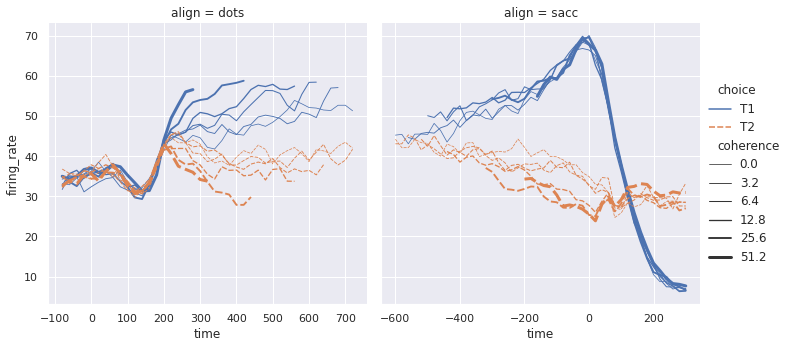

In [ ]:
# Load an example dataset
dots = sns.load_dataset("dots")

# Create a line plot ('kind="line"')
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

Notice how the ```size``` and ```style``` parameters are used in both the scatterplots and line charts, but they affect the two visualizations differently: changing the marker area and symbol in the scatterplot vs the line width and dashing in the line chart. We did not need to keep those details in mind, letting us focus on the overall structure of the figure and the information we want it to convey.

# Statistical estimation in Seaborn - error bars and confidence intervals

Often, we are interested in the average value of one variable as a function of other variables. Many ```seaborn``` functions will automatically perform the statistical estimation that is necessary to answer these questions:

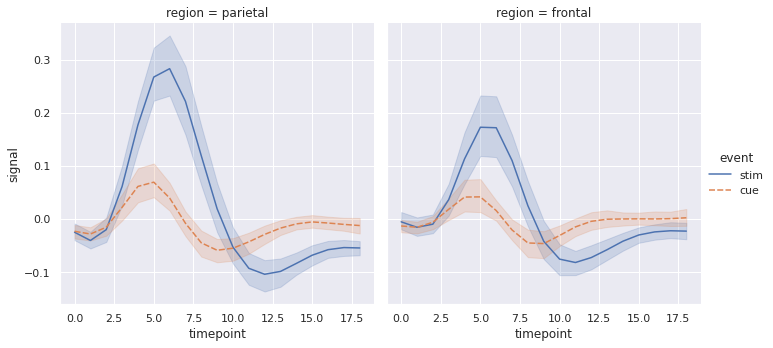

In [ ]:
# Load the fmri - functional MRI - example dataset
fmri = sns.load_dataset("fmri")

# Create a line plot
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

When statistical values are estimated, ```seaborn``` will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

Statistical estimation in ```seaborn``` goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using [lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) (Linear Model PLOT):

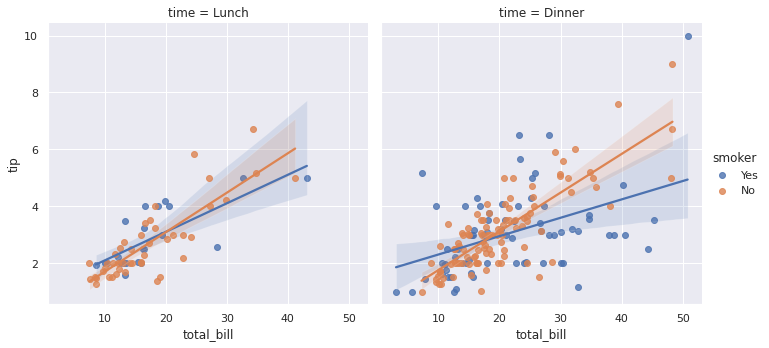

In [ ]:
# Plot the tips data overlaid with a linear model fit (best fit line)
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

# Representing distributions

Statistical analyses require knowledge about the distribution of variables in your dataset. The ```seaborn``` function [displot()](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) (short for 'distribution plot') supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

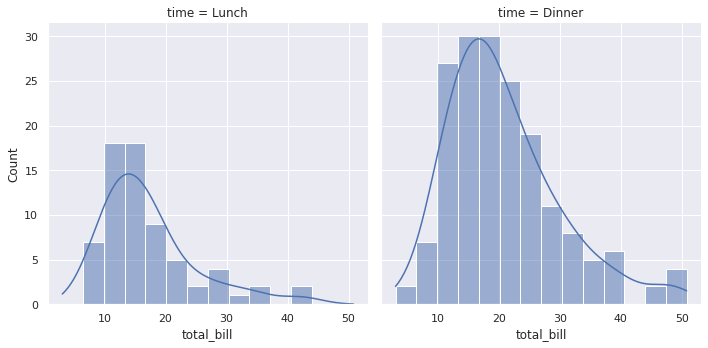

In [ ]:
# Plot the distribution of the tips dataset as a histogram (default),
# as well as its (continuous) kernel density ('kde=True')
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn also tries to promote techniques that are powerful but less familiar, such as calculating and plotting the cumulative distribution function of the data:

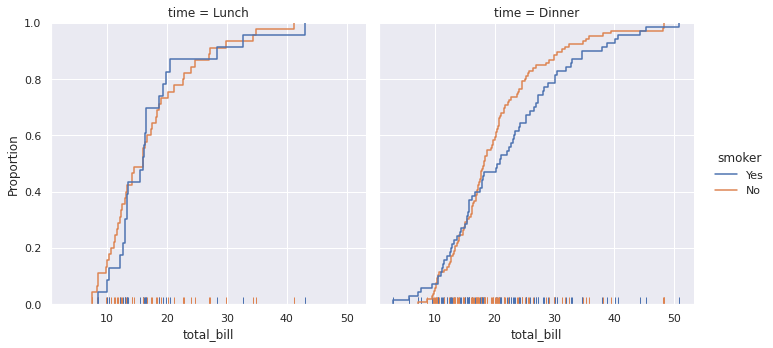

In [ ]:
# Plot the distribution of tips as an ECDF (Empirical Cumulative Distribution Function) ('kind = "ecdf"'),
# with the actual datapoints marked along the x-axis ('rug=True')
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

# Representing categorical data

Several specialized plot types in ```seaborn``` are oriented towards visualizing categorical data. They can be accessed through [catplot()](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot), short for 'categorical plot'. These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a "swarm plot": a scatter plot that adjusts the positions of the points along the categorical axis - in this case, the x-axis -  so that they don’t overlap (this is also known as adding "jitter"). Note that only the horizontal differences between the categories are "real": within a category, the horizontal jittering is purely to aid in visualization:

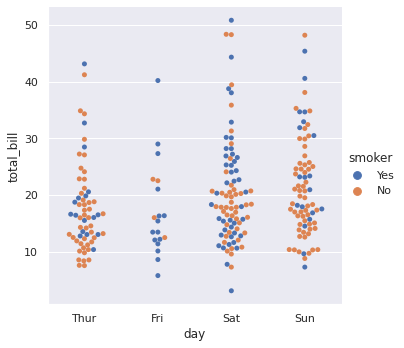

In [ ]:
# Plot categorical data as a swarm plot ('kind="swarm"')
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from. This is called a "violin plot":

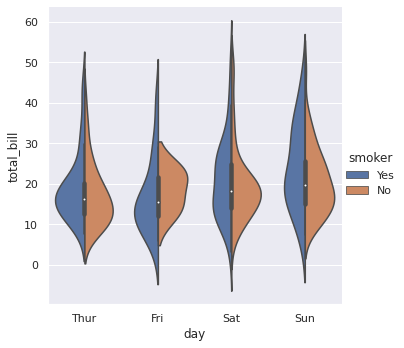

In [ ]:
# Plot categorical data as a violin ('kind="violin"') plot
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

Or you could could use our old friend, the trusty bar chart:



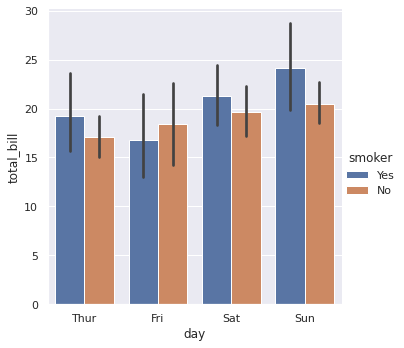

In [ ]:
# Plot the tips data as a bar chart ('kind="bar"')
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

# Visualizing multivariate datasets in Seaborn

Some ```seaborn``` functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, [jointplot()](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot), focuses on a single relationship. It plots the joint distribution (that is, the data in 2D) between two variables along with each variable’s marginal distribution (that is, the data in 1D projected along each axis):

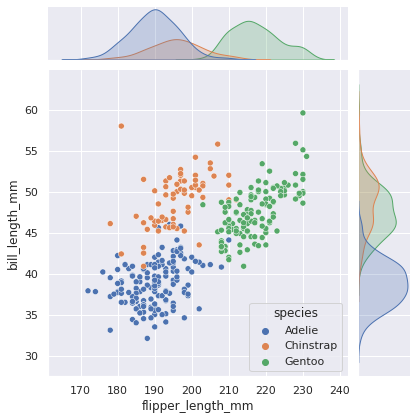

In [ ]:
# Load the penguins example dataset
penguins = sns.load_dataset("penguins")

# Plot the joint+marginal distributions of the penguins data
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

The other, [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively. (This is ```seaborn```'s implementation of the technique we called "scatterplot matrix" (SPLOM) in lecture):

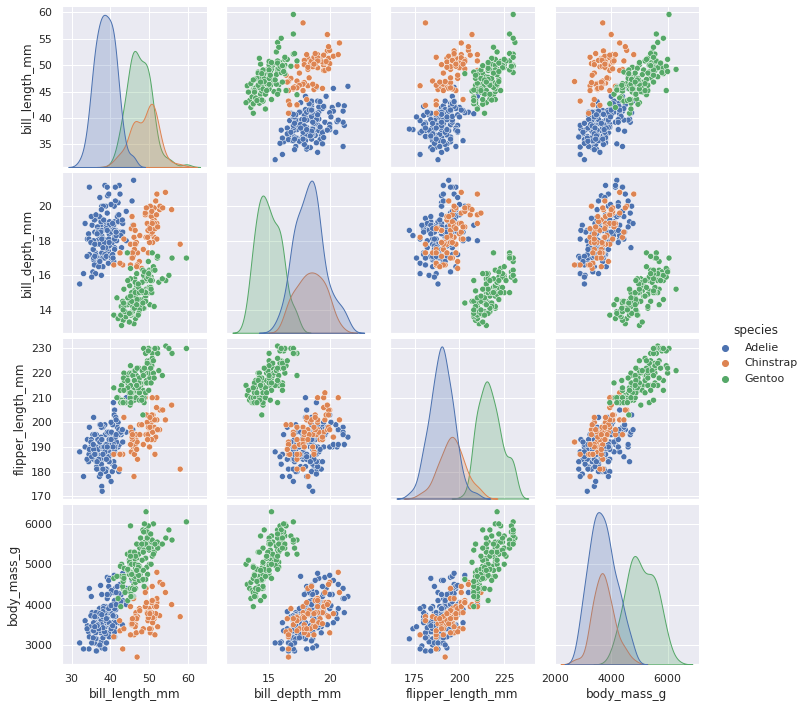

In [ ]:
# Plot the penguins dataset as a scatterplot matrix
sns.pairplot(data=penguins, hue="species")

# That's, well, most of it

There's certainly a lot more to talk about - and we're going to talk about a lot of it - but that's it for our high-level tour of ```seaborn```. Basically, you can visualize relationships - relplot() - between quantitative variables, you can visualize distributions - displot() - of one or more quantitative variables, you can visualize data split by categorical variables - catplot() - or you can create complex multivariate visualizations that combine multiple simpler plots - jointplot(), pairplot(), etc.

That's it for today. See you next week.